BZAN 542

Charles Liu

In [1]:
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import animation

from IPython import display

from sklearn import datasets
from sklearn import preprocessing
from sklearn import decomposition

In [2]:
def datagrid(X, S=1000):
    x0, x1 = X[:,0], X[:,1]
    extent = x0.min(), x0.max(), x1.min(), x1.max()
    x0, x1 = np.linspace(*extent[:2], num=S), np.linspace(*extent[2:], num=S)
    x0, x1 = np.meshgrid(x0, x1)
    return np.vstack((x0.ravel(), x1.ravel())).transpose(), x0.shape, extent

def KMeans_labels(X, C):
    return ((C**2).sum(0)[None,:]-2*np.dot(X, C)).argmin(1)

def KMeans_centers(X, L, K):
    L=np.arange(K)[:,None]==L[None,:]
    l=L.sum(1)+np.spacing(0)
    return np.dot(L, X)/l[:,None]

class KMeansUI(object):
    def __init__(self, X, Y, ax):
        self.X=X
        if isinstance(Y, int): self.Y, self.K=None, Y
        else: self.Y, self.K=Y, len(np.unique(Y))
        self.G, self.S, self.E = datagrid(self.X)
        self.ax=ax
    def show_clusters(self, msg=None):        
        self.ax.clear()
        self.ax.scatter(self.X[:,0], self.X[:,1], c=self.Y, s=20, edgecolors='r')
        self.ax.scatter(self.C[0], self.C[1], marker='x', s=100, linewidths=3, color='w', zorder=10)
        L=KMeans_labels(self.G, self.C)
        self.ax.imshow(L.reshape(self.S), extent=self.E, aspect='auto', origin='lower')
        for k in range(self.K):
            if k not in L: continue
            self.ax.text(self.C[0,k], self.C[1,k], k, color='w', size=16)
        self.ax.set_xlim(*self.E[:2])
        self.ax.set_ylim(*self.E[2:])
        if msg: self.ax.set_title(msg)
    def show_init(self, *args):
        self.T=0
        self.C=self.X[np.random.choice(len(self.X), self.K)].transpose()
        self.L=KMeans_labels(self.X, self.C)
        self.show_clusters('Random Initialization')
    def show_iter(self, *args):
        self.T+=1
        self.C=KMeans_centers(self.X, KMeans_labels(self.X, self.C), self.K).transpose()        
        L=KMeans_labels(self.X, self.C)
        self.D=(L!=self.L).sum()
        self.L=L
        self.show_clusters('Iteration %d with %d updates'%(self.T, self.D))

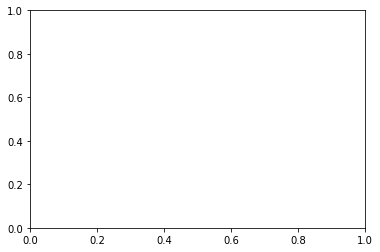

In [3]:
X, Y = datasets.load_iris(True)
X = preprocessing.scale(X)
X = decomposition.PCA(n_components=2).fit_transform(X)

fig = plt.figure()
kmeans = KMeansUI(X, Y, fig.gca())

In [4]:
anim=animation.FuncAnimation(fig, func=kmeans.show_iter, init_func=kmeans.show_init, interval=1000)
display.HTML(anim.to_jshtml())